<a href="https://colab.research.google.com/github/AnuragPatra/BlogWebsite/blob/master/DigitRecog1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the dataset**
Importing the MNIST dataset from keras library.

In [2]:
from keras.datasets import mnist
import tensorflow as tf

In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
!cat /proc/meminfo

MemTotal:       13333596 kB
MemFree:         9588224 kB
MemAvailable:   11924052 kB
Buffers:           78388 kB
Cached:          2298240 kB
SwapCached:            0 kB
Active:          1119236 kB
Inactive:        2228856 kB
Active(anon):     824204 kB
Inactive(anon):     8536 kB
Active(file):     295032 kB
Inactive(file):  2220320 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               796 kB
Writeback:             0 kB
AnonPages:        971552 kB
Mapped:           545740 kB
Shmem:              9152 kB
Slab:             168260 kB
SReclaimable:     122596 kB
SUnreclaim:        45664 kB
KernelStack:        4096 kB
PageTables:         8220 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666796 kB
Committed_AS:    3308316 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:              952 kB
AnonHugePages:   

In [5]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15556007189784880925, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14638920512
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14352954608729750301
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


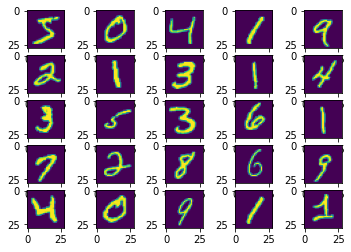

In [8]:
import matplotlib.pyplot as plt
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i])

# **Data Preprocessing**
**Reshape**: 
Reshape the input image into 1 dimension for the input layer of the neural networks.
Set input shape to (28,28,1) for the image, and input data type to float32.

---
**Normalize the data**:
The pixel values are changed from 0-255 to 0-1 for achieving better accuracy by the model.

---
**OneHotEncode the data**:
For the labels of the mnist data.
The labels should have 10 values, it represented the digit from 0 – 9 .The input image digit position is have the value 1 and all other values is 0 in the label.


In [9]:
#input image row and column
input_img_row = x_train[0].shape[0]
input_img_col = x_train[0].shape[1]

In [10]:
#reshape to have 1 dim
input_shape = (input_img_row, input_img_col, 1)
x_train = x_train.reshape(x_train.shape[0], input_img_row, input_img_col, 1)
x_test = x_test.reshape(x_test.shape[0], input_img_row, input_img_col, 1)

#set datatype as float32
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

# print(x_train[0])

In [11]:
#Normalise the data
x_train /= 255
x_test /= 255

# print(x_train[0])

In [12]:
#One Hot Encode the data labels
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [14]:
num_classes = y_train.shape[1]
num_pixels = x_train.shape[1]*x_train.shape[2]
print(f'Number of classes are {num_classes}.')
print(f'Number of pixels are {num_pixels}.')

Number of classes are 10.
Number of pixels are 784.


# **Build the CNN model**
Build layers and we use relu activation for the input layer and softmax activation for the output layers.
To enhance the effectiveness of the algorithm, we use more layers.
 
 ---
 First off, import all required packages

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import SGD

In [16]:
model = Sequential()

In [17]:
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=128, activation="relu",))
model.add(Dropout(0.25))
model.add(Dense(units=num_classes, activation="softmax",))

In [18]:
#Compiling and optimising the model
model.compile(optimizer=SGD(0.01), loss="categorical_crossentropy", metrics=["accuracy"])

In [28]:
#train the model
train = model.fit(x=x_train, y=y_train, batch_size=20, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0101 - accuracy: 0.9968 - val_loss: 0.0340 - val_accuracy: 0.9912
Epoch 2/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0073 - accuracy: 0.9975 - val_loss: 0.0335 - val_accuracy: 0.9912
Epoch 3/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 0.0329 - val_accuracy: 0.9911
Epoch 4/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.0324 - val_accuracy: 0.9918
Epoch 5/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.0325 - val_accuracy: 0.9917
Epoch 6/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0053 - accuracy: 0.9982 - val_loss: 0.0326 - val_accuracy: 0.9918
Epoch 7/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.0329 - val_ac

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (10, 26, 26, 32)          320       
_________________________________________________________________
conv2d_1 (Conv2D)            (10, 24, 24, 64)          18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (10, 12, 12, 64)          0         
_________________________________________________________________
dropout (Dropout)            (10, 12, 12, 64)          0         
_________________________________________________________________
flatten (Flatten)            (10, 9216)                0         
_________________________________________________________________
dense (Dense)                (10, 128)                 1179776   
_________________________________________________________________
dropout_1 (Dropout)          (10, 128)                 0

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 0.03046061471104622
Test accuracy: 0.9901999831199646


Now you can save the model and load it for predictions!

In [22]:
model.save('cnn_model.h5')

In [23]:
from keras.models import load_model

loaded_model = load_model('cnn_model.h5')

In [24]:
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 0.03046061471104622
Test accuracy: 0.9901999831199646


In [25]:
#testing out the model on an image
import numpy as np
input_img = x_test[2001]
input_img = input_img.reshape(1, 28, 28,1)
result = model.predict(input_img)
print(result)
result = np.asarray(np.argsort(model.predict(input_img))).reshape(-1)[-2:]
print(result)

[[1.1047954e-06 1.2205621e-10 2.4310240e-10 4.2200208e-09 9.8528563e-09
  9.9980217e-01 1.4537679e-07 4.2455488e-07 5.1887306e-05 1.4429864e-04]]
[9 5]


The number is: 5
If not, it is most likely 9.


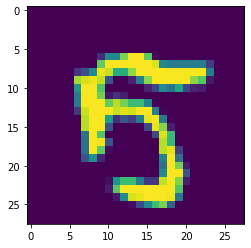

In [26]:
plt.imshow(input_img.reshape(28,28))
print(f'The number is: {result[1]}')
print(f'If not, it is most likely {result[0]}.')